In [218]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import NaN
from functions import * # import functions from the .py file

from pylab import rcParams
rcParams["figure.figsize"] = 16, 4

PAYLOADSIZE = 14

if PAYLOADSIZE % 2 != 0:
    print("Alarm! the payload size is not even.")
NUM_16RND = (PAYLOADSIZE-2)//2 # how many 16 bits random number included in each frame
MAX_SEQ = 256 # (decimal) maximum seq number defined by the length of the seq, the length of seq is 1B

## Log file

**For a fair comparison between groups, must follow the output format below**
<br>$\color{red}{\text{timestamp_rx }|\text{ len [hex] } \text{ seq [hex] } \text{ payload [hex] }|\text{rssi}}$
<br>$\text{ len [hex]}$ = payload length + 1 (seq. field length [1B])
<br>$\text{ payload [hex]}$ should start with the pseudo sequence number [2B], indicates the starting byte's position in the file.
***
*Example log file output for one frame with reciever timestamp xxxx, frame length, seq number and random payload, received signal strength.*
<br>15:17:18.394 |0f 46 bd f8 f7 ea 41 ac 1b be 05 a0 7f d2 09 d4 |  -91 CRC error
<br>$\color{red}{\text{delimiter for four variables is "|" and delimiter for the payload each byte is the space " ".}}$

#### Restore data

In [219]:
# define the file name
filename = "5m"
# import file to jupyter notebook
df_read = readfile("./test/" + filename + ".txt")
# check the raw data first 10 lines
df_read.head(10)

,index,time_rx,rssi,seq,payload
0,0,2023-05-23 11:18:13.221,-89,0,00 00 00 00 00 00
1,1,2023-05-23 11:18:13.326,-89,0,00 00 00 4d 74 00
2,2,2023-05-23 11:18:13.425,-89,0,00 00 00 7d 0c ba
3,3,2023-05-23 11:18:13.526,-88,0,00 00 00 6d 17 e5
4,4,2023-05-23 11:18:13.625,-89,0,00 00 00 95 bc 66
5,5,2023-05-23 11:18:13.726,-88,0,00 00 00 87 f9 7e
6,6,2023-05-23 11:18:13.828,-89,0,00 00 00 3d fb 2e
7,7,2023-05-23 11:18:14.083,-89,1,00 00 00 00 30 5e
8,8,2023-05-23 11:18:14.186,-89,1,00 00 00 81 ac 97
9,9,2023-05-23 11:18:14.289,-88,1,00 00 00 ae c0 84


In [220]:
# For debug
df_decode = df_read
df_decode['hex_payload'] = df_decode['payload'].apply(lambda x: format(int(x.replace(' ', ''), 16), 'x'))
print(df_decode['hex_payload'])

0           0
1      4d7400
2      7d0cba
3      6d17e5
4      95bc66
        ...  
695    67b7f7
696    536e55
697    13e152
698    7ddb26
699    7e3276
Name: hex_payload, Length: 700, dtype: object


In [221]:
df_decode['decoded_payload'] = df_decode['hex_payload'].apply(lambda x: CorrectError(int(x.replace(' ', ''), 16)))

Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder: 352
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder: 80000000000
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:  0
Remainder:

In [222]:
# After correct
print(df_decode['decoded_payload'])

0           0
1      4d7400
2      7d0cba
3      6d17e5
4      95bc66
        ...  
695    67b7f7
696    536e55
697    13e152
698    7ddb26
699    7e3276
Name: decoded_payload, Length: 700, dtype: object


In [223]:
df_decode['restore_payload'] = df_decode['hex_payload'].apply(lambda x: RestoreRawData(int(x.replace(' ', ''), 16)))
print(df_decode['restore_payload'])
df_decode.head(575)

0         0
1      135d
2      1f43
3      1b45
4      256f
       ... 
695    19ed
696    14db
697     4f8
698    1f76
699    1f8c
Name: restore_payload, Length: 700, dtype: object


,index,time_rx,rssi,seq,payload,hex_payload,decoded_payload,restore_payload
0,0,2023-05-23 11:18:13.221,-89,0,00 00 00 00 00 00,0,0,0
1,1,2023-05-23 11:18:13.326,-89,0,00 00 00 4d 74 00,4d7400,4d7400,135d
2,2,2023-05-23 11:18:13.425,-89,0,00 00 00 7d 0c ba,7d0cba,7d0cba,1f43
3,3,2023-05-23 11:18:13.526,-88,0,00 00 00 6d 17 e5,6d17e5,6d17e5,1b45
4,4,2023-05-23 11:18:13.625,-89,0,00 00 00 95 bc 66,95bc66,95bc66,256f
...,...,...,...,...,...,...,...,...
570,570,2023-05-23 11:19:27.702,-90,86,00 00 00 9b f0 18,9bf018,9bf018,26fc
571,571,2023-05-23 11:19:27.803,-91,86,00 00 00 bc c3 9a,bcc39a,bcc39a,2f30
572,572,2023-05-23 11:19:28.054,-88,87,00 00 00 10 53 92,105392,105392,414
573,573,2023-05-23 11:19:28.158,-89,87,20 00 00 7f b8 4d,2000007fb84d,2000007fb84d,1fee


In [224]:
# Convert payload column to string type
df_decode['string_payload'] = df_decode['restore_payload'].astype(str)

# Define custom function to format payload values
def format_payload(payload):
    # Remove spaces and split into pairs of characters
    payload = payload.replace(' ', '')
    
    # Add leading zeros if the length is odd
    if len(payload) % 2 != 0:
        payload = '0' + payload
    
    # Split into pairs of characters
    formatted_payload = [payload[i:i+2] for i in range(0, len(payload), 2)]
    
    # Insert space between every two characters
    formatted_payload = ' '.join(formatted_payload)
    
    return formatted_payload

# Apply format_payload function to restore_payload column
df_decode['formatted_payload'] = df_decode['string_payload'].apply(format_payload)

# Output the result
#df_decode.head(23)

# Output the result

print(df_decode['formatted_payload'])

0         00
1      13 5d
2      1f 43
3      1b 45
4      25 6f
       ...  
695    19 ed
696    14 db
697    04 f8
698    1f 76
699    1f 8c
Name: formatted_payload, Length: 700, dtype: object


In [225]:
df = pd.DataFrame(columns=['index', 'time_rx', 'rssi', 'seq', 'payload'])

# Grouped by 'seq'
grouped = df_decode.groupby('seq')

# Regroup payload
rows = []
index = 0
for seq, group in grouped:
    formatted_payloads = group['formatted_payload'].tolist()
    
    # Check formatted_payload 
    for i in range(len(formatted_payloads)):
        if len(formatted_payloads[i]) == 1:
            formatted_payloads[i] = '00 ' + formatted_payloads[i]
        elif len(formatted_payloads[i]) == 2 and formatted_payloads[i] <= 'ff':
            formatted_payloads[i] = '00 ' + formatted_payloads[i]
    
    payload = ' '.join(formatted_payloads)
    
    # Check if need add "00"
    payload_size = len(payload.split(' '))
    if payload_size < 14:
        payload += ' 00' * (14 - payload_size)
    
    rows.append({
        'index': index,
        'time_rx': group['time_rx'].iloc[-1],
        'rssi': group['rssi'].iloc[-1],
        'seq': seq,
        'payload': payload
    })
    
    index += 1

# Put the rows to new dataframe df
df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)

# Tuen rssi into datatype 'int'
df['rssi'] = df['rssi'].astype(int)

# Reset index
df.reset_index(drop=True, inplace=True)

# If length larger than 100, then cut it off.
if len(df) > 100:
    df = df[:100]

# Check output
df.head(100)

,index,time_rx,rssi,seq,payload
0,0,2023-05-23 11:18:13.828,-89,0,00 00 13 5d 1f 43 1b 45 25 6f 21 fe 0f 7e
1,1,2023-05-23 11:18:14.691,-89,1,00 0c 20 6b 2b b0 24 4b 26 55 22 e8 00 00
2,2,2023-05-23 11:18:15.549,-93,2,00 18 14 20 1f 30 25 19 1a 14 23 8c 00 00
3,3,2023-05-23 11:18:16.413,-91,3,00 24 19 e2 17 c2 25 4e 1f 4c 27 bf 31 bf
4,4,2023-05-23 11:18:17.271,-89,4,00 30 1c 08 23 fc 17 c2 22 1b 1c e4 25 de
...,...,...,...,...,...
95,95,2023-05-23 11:19:35.542,-88,95,04 74 2a 76 19 9e 16 8b 21 54 17 9f 28 3f
96,96,2023-05-23 11:19:36.401,-89,96,04 80 1e 10 11 68 28 81 1d c3 15 96 14 cd
97,97,2023-05-23 11:19:37.261,-90,97,04 8c 29 76 1c 88 18 1a 27 f7 1e 55 00 00
98,98,2023-05-23 11:19:38.121,-89,98,04 98 0e de 21 93 1e 36 17 7f 35 78 26 4a


In [226]:
# delete the corrupted packets (PAYLOADSIZE + 2B pesudo sequence number)
#df = df[df.payload.apply(lambda x: len(x)==((PAYLOADSIZE)*3-1))]
#df.reset_index(inplace=True)

In [227]:
# replace the resettable seq number to unresettable, for the purpose of reliability calculation
#test = replace_seq(df.copy(), MAX_SEQ=256)
#test.rename(columns = {'seq':'old_seq', 'new_seq':'seq'}, inplace = True)

# Time

## Definition

**Evaluation metric**
<br>*File Transmission Time: the total latency that certain amount of Data $F$ is delivered to the destination.*
<br> $File\ Delay = Rx\_timestamp[N] - Rx\_timestamp[0]$
<br> where $N$ is the last packet
***
**Interesting to look at**:
<br>*Timestamp difference*: $\Delta T[i] = Rx\_timestamp[i] - Tx\_timestamp[i]$
1. *Worst-case packet delay*: the delay of the packet that takes the longest time to traverse.
2. *Packet delay variation*: the std of the packet delay.

In [228]:
# compute the file delay
file_delay = df_read.time_rx[len(df_read) - 1] - df_read.time_rx[0]
# convert the timedelta to s
file_delay_s = np.timedelta64(file_delay, "ms").astype(int) / 1000
print(f"The time it takes to transfer the file is : {file_delay}, which is {file_delay_s} seconds.")

The time it takes to transfer the file is : 0 days 00:01:31.380000, which is 91.38 seconds.


# Reliability

## Definition

**Evaluation metric**
<br>*Quality of data transfer.*
<br>*Bit Reliability*: The ratio of data bits correctly delivered to the data sink.
<br>*Bit Error Rate*: The ratio of data bits incorrectly delivered to the data sink.
$$Bit\ Reliability = 1 - BER = 1 - \frac{Number\ of\ wrong\ bit}{Total\ Number\ of\ bit\ sent}$$
***
**Interesting to look at**:
1. *Expected number of transmission*: the ratio of the number of packets correctly received by the data sink and the number of packets sent by the source.

$$ETX = \frac{Number\ of\ packet\ received}{Number\ of\ packet\ sent}$$

2. *Packet reliability*: the number of packet bit correctly delivered to next hop.

## Statistics

In [229]:
# compute the BER for all received packets
# return the in total ber for received file, error statistics and correct file content supposed to be transmitted
ber, error, file_content = compute_ber(df, PACKET_LEN=NUM_16RND*2, MAX_SEQ=MAX_SEQ)
bit_reliability = (1-ber)*100
print(f"Bit reliability [%]: {bit_reliability}")

100
The total number of packets transmitted by the tag is 100.
Error statistics dataframe is:
    seq bit_error_tmp  bit_error
0     0           [0]          0
1     1          [15]         15
2     2           [8]          8
3     3           [4]          4
4     4           [0]          0
..  ...           ...        ...
95   95           [0]          0
96   96           [0]          0
97   97          [49]         49
98   98           [0]          0
99   99          [38]         38

[100 rows x 3 columns]
Bit reliability [%]: 87.57291666666667


In [230]:
packets = len(df)
print(df.seq[packets-1])

99


In [231]:
# payload example for debug purpose
# correct sequence for pesudoseq NO. '0000'
tmp = file_content.loc[int('0000', base=16), 'data']
for i in tmp:
    print("{:02x}".format(i), end=" ")

13 5d 1f 43 1b 45 25 6f 21 fe 0f 7e 

Text(0.5, 0, 'Seq. Number')

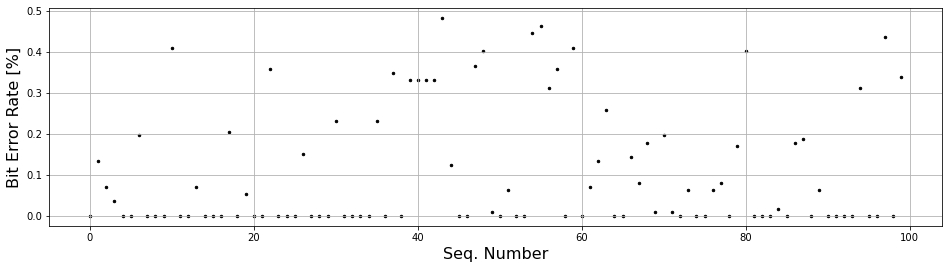

In [232]:
# BER for each packet
plt.scatter(error.seq, error.bit_error/(PAYLOADSIZE*8), marker='o', s=6, color='black')
plt.grid()
plt.ylabel('Bit Error Rate [%]', fontsize=16)
plt.xlabel('Seq. Number', fontsize=16)

# Distance

## Definition

**The communication distance of the system.**
<br>$D_{1}$: the distance between carrier<->backscatter_tag[m]
<br>$D_{2}$: the distance between backscatter_tag<->receiver[m]
<br> Distance metric = $D_{1}^2D_{2}^2$
<br>

In [233]:
# record the distance
dis_carrier_tag = 1
dis_tag_rx = 5

dis_metric = dis_carrier_tag**2*dis_tag_rx**2
print(f"Distance metric is: {dis_metric}")

Distance metric is: 25


# Radarplot

**Please pay attention to the unit**
<br> <font color='red'>Time</font>: use second as unit
<br> <font color='red'>Reliability</font>: use the percent as unit
<br> <font color='red'>Distance</font>: use meter as unit
<br>**Metics = [Time(s), Reliability(%), Distance(m)]**
<br> <font color='red'>Always keep the reference in your plot.</font>
<br> Tips: for ploting, time metric uses $\frac{1}{Time}*1000$ as the time metric, the higher the value the better the system performance

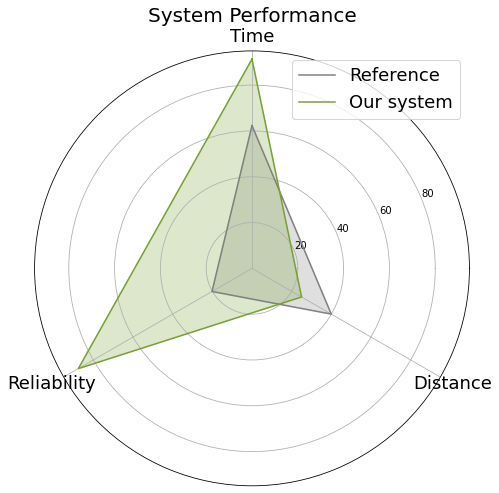

In [234]:
metrics = [file_delay_s, bit_reliability, dis_metric]
radar_plot(metrics)